<ipython-input-6-fe10ed7a15ba>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dados = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


Primeiras linhas do conjunto de dados:
    Area  Perimetro  Compacidade  Comprimento_Nucleo  Largura_Nucleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   Coef_Assimetria  Comprimento_Sulco  Classe  
0            2.221              5.220       1  
1            1.018              4.956       1  
2            2.699              4.825       1  
3            2.259              4.805       1  
4            1.355              5.175       1  

Resumo estatístico dos dados:
             Area   Perimetro  Compacidade  Comprimento_Nucleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.

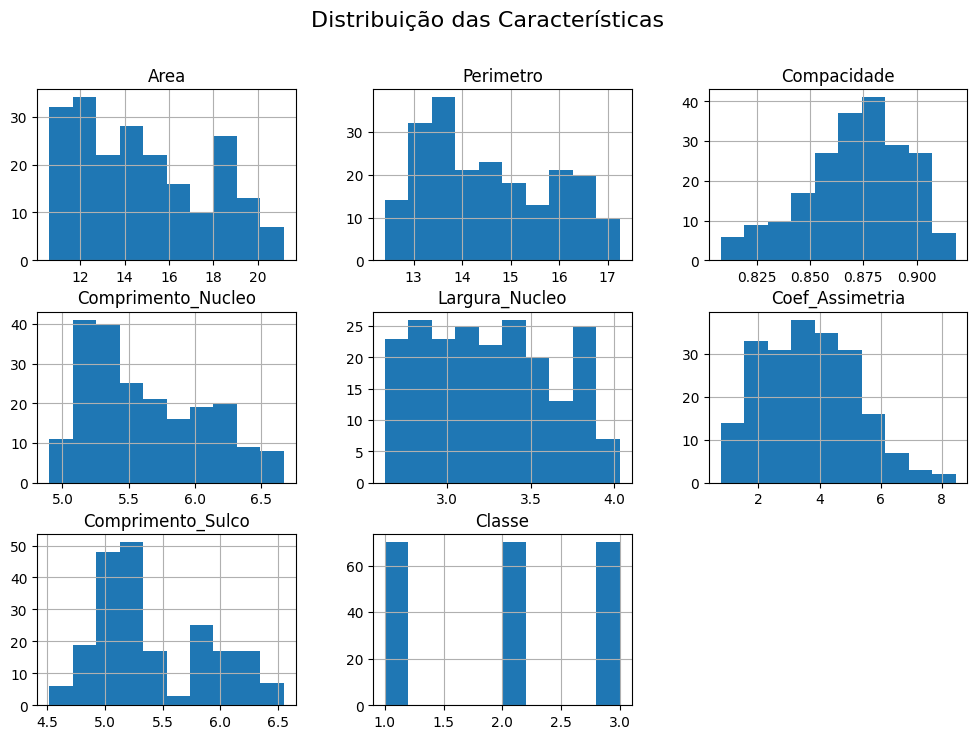

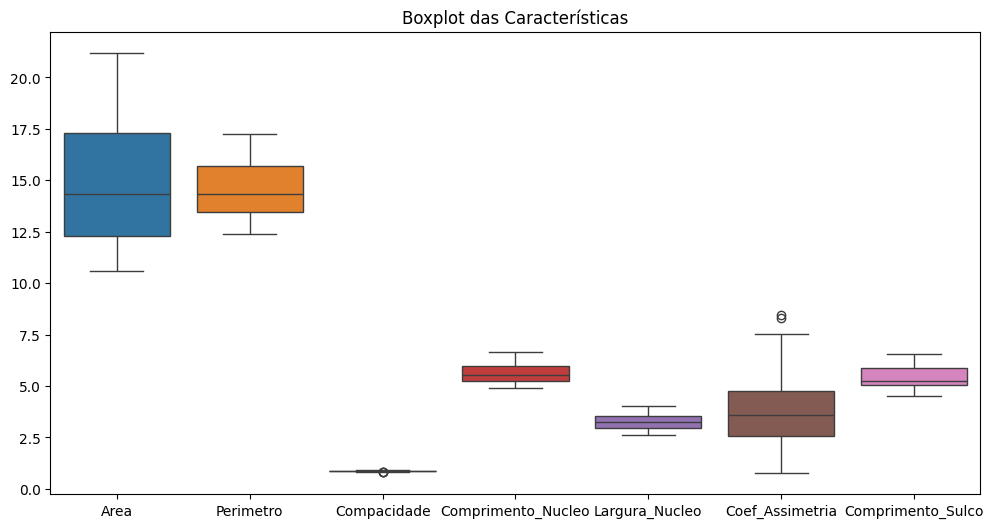

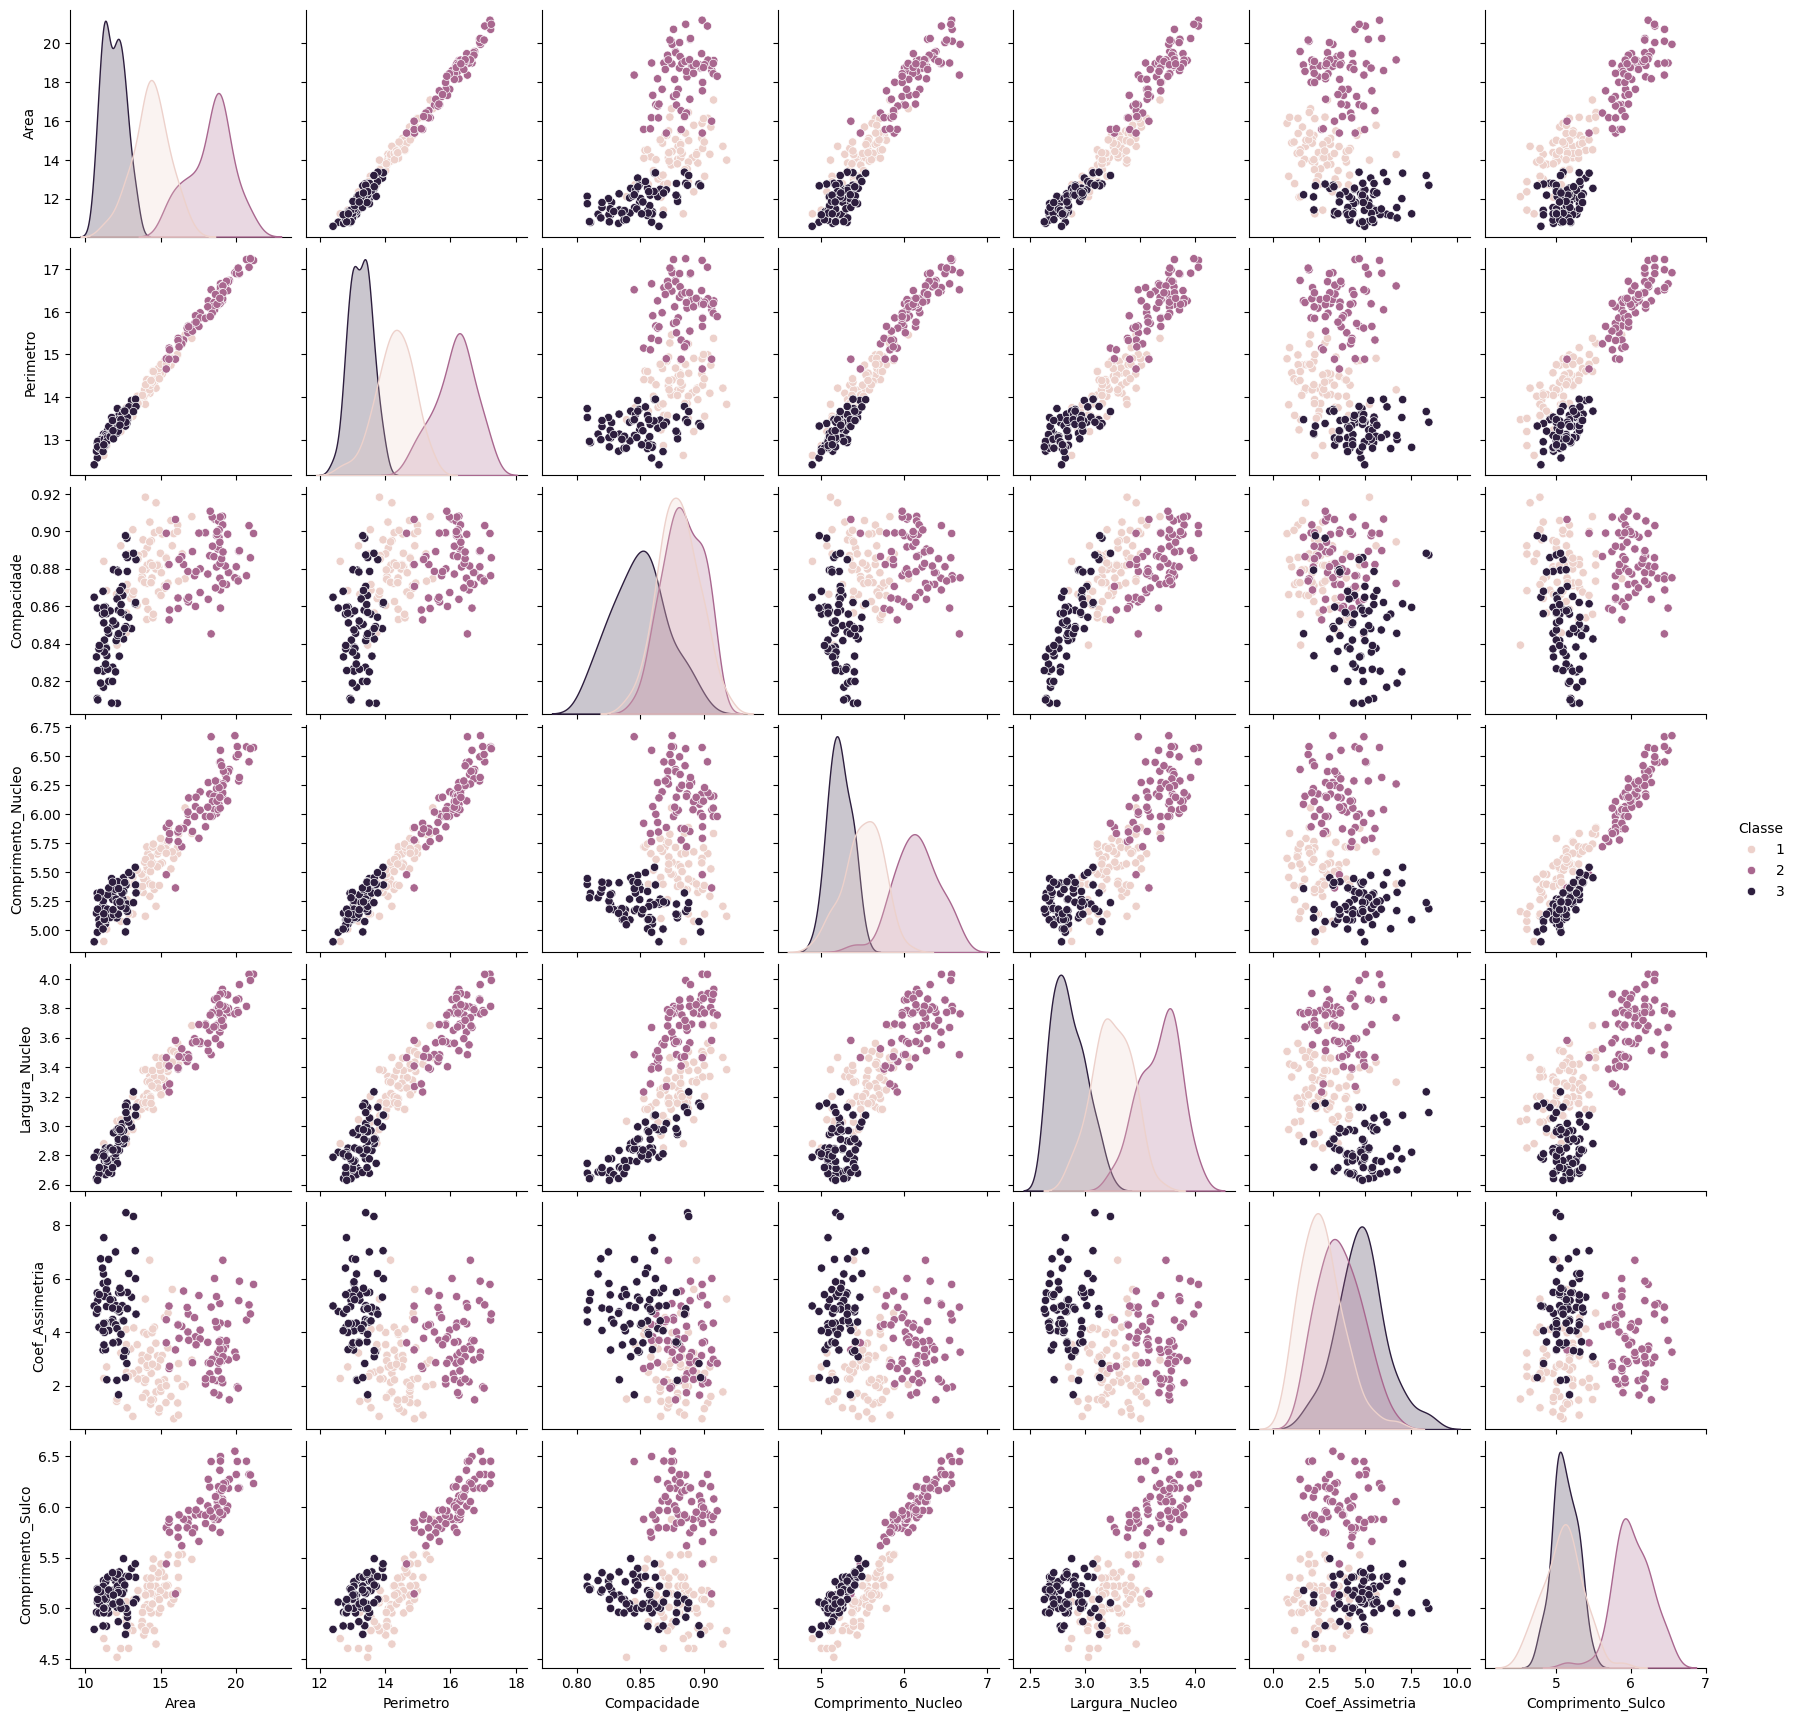


Modelo: Random Forest
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Acurácia: 0.89


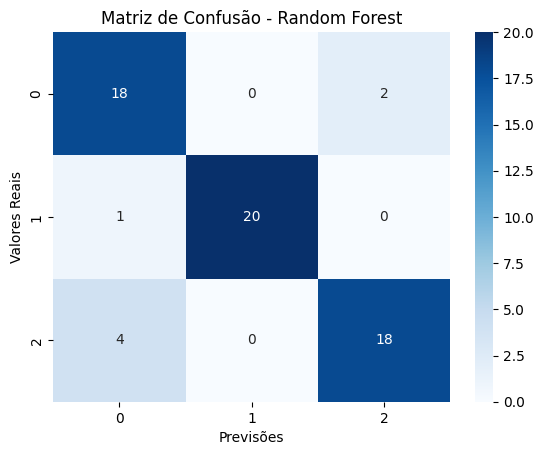


Modelo: KNN
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Acurácia: 0.90


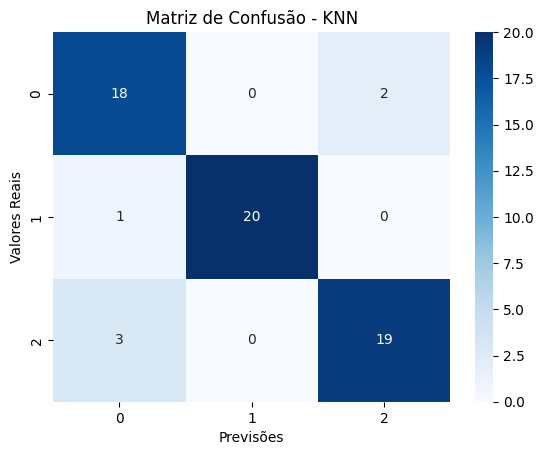


Modelo: SVM
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Acurácia: 0.92


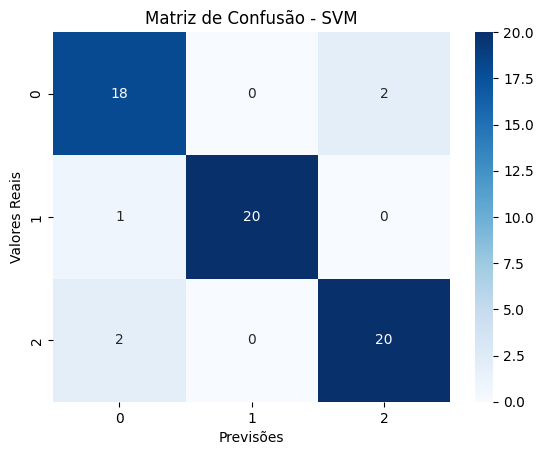


Comparação de Acurácia entre os modelos:
Random Forest: 0.89
KNN: 0.90
SVM: 0.92


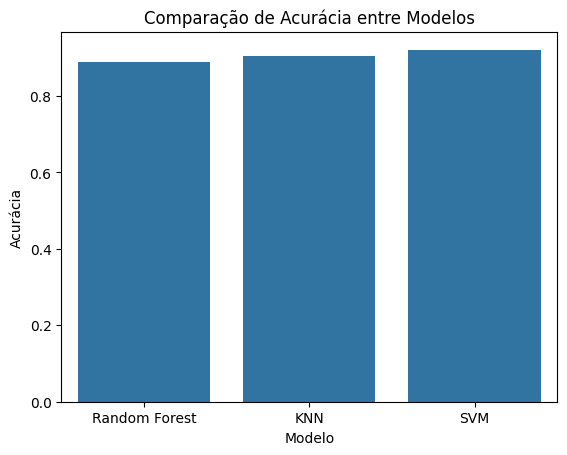


Melhores parâmetros encontrados para Random Forest:
{'max_depth': None, 'n_estimators': 100}

Desempenho do modelo otimizado (Random Forest):
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



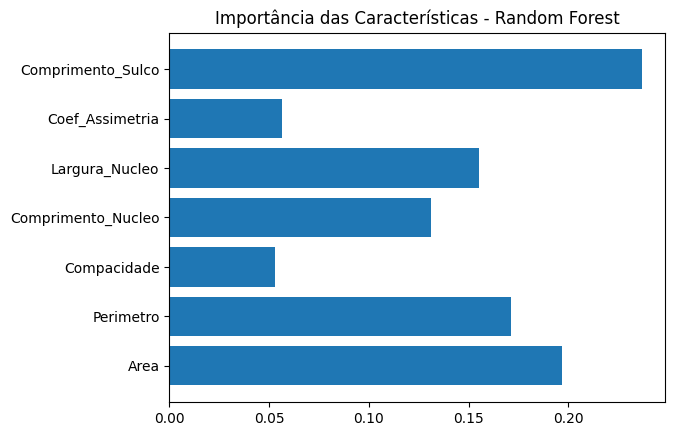

In [6]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Carregando o dataset
dados = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)
dados.columns = ['Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo',
                 'Largura_Nucleo', 'Coef_Assimetria', 'Comprimento_Sulco', 'Classe']

# Explorando o dataset
print("Primeiras linhas do conjunto de dados:")
print(dados.head())

print("\nResumo estatístico dos dados:")
print(dados.describe())

print("\nValores ausentes:")
print(dados.isnull().sum())

# Cálculo da média, mediana e desvio padrão
estatisticas = dados.describe().T
estatisticas['Mediana'] = dados.median()
estatisticas['Desvio Padrão'] = dados.std()

print("\nEstatísticas Descritivas (Média, Mediana e Desvio Padrão):")
print(estatisticas[['mean', 'Mediana', 'std']].rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'}))


# Visualizando (Histogramas e Boxplots)
dados.hist(figsize=(12, 8))
plt.suptitle("Distribuição das Características", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dados.drop('Classe', axis=1))
plt.title("Boxplot das Características")
plt.show()

# Gráficos de dispersão para relações entre características
sns.pairplot(dados, hue='Classe', diag_kind='kde')
plt.show()

# Divisão em treino e teste
X = dados.drop('Classe', axis=1)
y = dados['Classe']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização das características
escalador = StandardScaler()
X_treino = escalador.fit_transform(X_treino)
X_teste = escalador.transform(X_teste)

# Modelos classificação (3 modelos)
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

# Treinando e avaliando cada modelo
resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    # Relatório de desempenho
    print(f"\nModelo: {nome}")
    print(classification_report(y_teste, y_pred))

    # Acurácia
    acuracia = accuracy_score(y_teste, y_pred)
    resultados[nome] = acuracia
    print(f"Acurácia: {acuracia:.2f}")

    # Matriz de confusão
    matriz_confusao = confusion_matrix(y_teste, y_pred)
    sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel('Previsões')
    plt.ylabel('Valores Reais')
    plt.show()

# Comparação entre os modelos
print("\nComparação de Acurácia entre os modelos:")
for nome, acuracia in resultados.items():
    print(f"{nome}: {acuracia:.2f}")

df_resultados = pd.DataFrame({'Modelo': list(resultados.keys()), 'Acurácia': list(resultados.values())})
sns.barplot(x='Modelo', y='Acurácia', data=df_resultados)
plt.title("Comparação de Acurácia entre Modelos")
plt.show()

# Otimização de hiperparâmetros (com Random Forest)
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_treino, y_treino)

print("\nMelhores parâmetros encontrados para Random Forest:")
print(grid_search.best_params_)

# Avaliando o modelo otimizado
modelo_otimizado = grid_search.best_estimator_
y_pred_otimizado = modelo_otimizado.predict(X_teste)

print("\nDesempenho do modelo otimizado (Random Forest):")
print(classification_report(y_teste, y_pred_otimizado))

# Importância das características para Random Forest
importancias = modelo_otimizado.feature_importances_
plt.barh(dados.columns[:-1], importancias)
plt.title("Importância das Características - Random Forest")
plt.show()



